# I. Bootstrap


- ### Loading data

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Carol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Carol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
print(Penn.shape)
Penn.head()

(13913, 24)


,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
2,10551,5,18,6,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [13]:
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
2,10551,5,18,6,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,10831,5,27,27,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
13910,10817,4,4,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
13911,10691,0,27,27,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,NaN


In [14]:
import pyreadr

- ### Subset treatment 4

In [20]:

data = Penn[ (Penn['tg'] == 4) | (Penn['tg'] == 0) ]
n = data.shape[0]
print(data.shape)

(5099, 24)


In [21]:
data['log_inuidur1'] = np.log( data["inuidur1"] )
# depend variable
data['T4']=(data[['tg']]==4).astype(int)
data

C:\Users\Carol\AppData\Local\Temp/ipykernel_15132/2274460541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_inuidur1'] = np.log( data["inuidur1"] )
C:\Users\Carol\AppData\Local\Temp/ipykernel_15132/2274460541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['T4']=(data[['tg']]==4).astype(int)


,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,T4
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,1,0,NaN,2.890372,0
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,0.000000,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,3.295837,0
11,10607,4,9,9,0,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,2.197225,1
12,10831,0,27,27,0,0,0,0,1,0,...,0,1,1,0,1,0,0,NaN,3.295837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,10628,4,10,10,0,0,1,0,0,0,...,1,0,0,0,0,0,1,NaN,2.302585,1
13905,10523,4,4,4,0,0,1,0,2,0,...,0,0,0,0,0,0,1,NaN,1.386294,1
13906,10558,0,9,9,0,0,0,0,2,0,...,1,0,0,0,1,0,0,NaN,2.197225,0
13910,10817,4,4,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,NaN,1.386294,1


In [22]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 13911
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abdt          5099 non-null   int64  
 1   tg            5099 non-null   int64  
 2   inuidur1      5099 non-null   int64  
 3   inuidur2      5099 non-null   int64  
 4   female        5099 non-null   int64  
 5   black         5099 non-null   int64  
 6   hispanic      5099 non-null   int64  
 7   othrace       5099 non-null   int64  
 8   dep           5099 non-null   int64  
 9   q1            5099 non-null   int64  
 10  q2            5099 non-null   int64  
 11  q3            5099 non-null   int64  
 12  q4            5099 non-null   int64  
 13  Unnamed: 13   5099 non-null   int64  
 14  q5            5099 non-null   int64  
 15  q6            5099 non-null   int64  
 16  recall        5099 non-null   int64  
 17  agelt35       5099 non-null   int64  
 18  agegt54       5099 non-null

- ### Sample function

This sample has replacement

In [23]:
def indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In [24]:
indices(data,5099)

array([ 9608,  7957,  7203, ..., 11778,  4212,  2668], dtype=int64)

- ### Get estimates

In [37]:
def estimates(data,index):
    X = data[['T4','female','black','othrace','dep','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']].loc[index]
    y = data['log_inuidur1'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)   
    
    coef = lr.coef_
    return [coef]

- ### Boot

In [39]:
def boot(data,function,R):
    coef_1 = []
    coef_2 = []
    coef_3 = []
    
    for i in range(R):
        coef_1.append(function(data,indices(data,n))[0][0]) 
        coef_2.append(function(data,indices(data,n))[0][1])
        coef_3.append(function(data,indices(data,n))[0][2])
        
    coef_1_stat = {'estimated_value':np.mean(coef_1),'std_error':np.std(coef_1)}   
    coef_2_stat = {'estimated_value':np.mean(coef_2),'std_error':np.std(coef_2)}
    coef_3_stat = {'estimated_value':np.mean(coef_3),'std_error':np.std(coef_3)}
    
    return {'coef_1_statistics':coef_1_stat,'coef_2_statistics':coef_2_stat,'coef_3_statistics':coef_3_stat}

- ### Results

In [40]:
results = boot(data,estimates,1000)
results

{'coef_1_statistics': {'estimated_value': -0.07562135866142389,
  'std_error': 0.0340835140918622},
 'coef_2_statistics': {'estimated_value': 0.13674859503202036,
  'std_error': 0.03473944776811806},
 'coef_3_statistics': {'estimated_value': -0.31275039158731904,
  'std_error': 0.05879731567724221}}

In [41]:
table = np.zeros((3, 2))
table[0,0] = results['coef_1_statistics']['estimated_value']
table[1,0] = results['coef_2_statistics']['estimated_value']
table[2,0] = results['coef_3_statistics']['estimated_value']

table[0,1] = results['coef_1_statistics']['std_error']
table[1,1] = results['coef_2_statistics']['std_error']
table[2,1] = results['coef_3_statistics']['std_error']

table = pd.DataFrame(table, columns = ["Estimated Value","Std Error"], \
                      index = ["$T4$", "$Female$", "$Black$"])
table

,Estimated Value,Std Error
$T4$,-0.075621,0.034084
$Female$,0.136749,0.034739
$Black$,-0.312750,0.058797


# II. Comparative models

In [12]:
import hdmpy
import pyreadr
import patsy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

import scipy.linalg as sci_lag
import math
import random


In [13]:
cps2012_env = pyreadr.read_r("../../data/cps2012.Rdata")
# Extracting the data frame
data = cps2012_env[ 'data' ]
data

,year,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,2012.0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,2012.0,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2012.0,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,2012.0,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,2012.0,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212,2012.0,3.978513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,27.0,7.29,19.683,53.1441,301.43,False,False,False
29213,2012.0,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,206.36,False,False,False
29214,2012.0,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.41,9.261,19.4481,272.35,True,False,True
29215,2012.0,3.142265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.04,0.008,0.0016,282.87,True,False,False


In [14]:
data.shape

(29217, 23)

In [15]:
Z = data.loc[:, 'female':'sc']
Z.columns

Index(['female', 'widowed', 'divorced', 'separated', 'nevermarried', 'hsd08',
       'hsd911', 'hsg', 'cg', 'ad', 'mw', 'so', 'we', 'exp1', 'exp2', 'exp3',
       'exp4', 'weight', 'married', 'ne', 'sc'],
      dtype='object')

## Analysis

Due to the skewness of the data, we are considering log wages which leads to the following regression model

$$log(wage) = g(Z) + \epsilon.$$

We will estimate the two sets of prediction rules: Linear and Nonlinear Models.
In linear models, we estimate the prediction rule of the form

$$\hat g(Z) = \hat \beta'X.$$
Again, we generate $X$ in two ways:
 
1. Basic Model:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators, regional indicators).


2. Flexible Model:  $X$ consists of all raw regressors from the basic model plus occupation and industry indicators, transformations (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions.

To evaluate the out-of-sample performance, we split the data first.

In [16]:
nrow = data.shape[0]
length = int(nrow*(3/4))

In [17]:
from numpy.random import default_rng


random.seed(123)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)
training_bool = data.index.isin( training )

training_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
from numpy.random import default_rng


random.seed(123)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)

training_bool = data.index.isin( training )

data_train = data.iloc[training,:]

data_train = data[training_bool]
data_test = data[~training_bool]

In [19]:
data_train

,year,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,2012.0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
2,2012.0,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,2012.0,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,2012.0,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False
6,2012.0,2.456086,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,33.0,10.89,35.937,118.5921,497.82,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211,2012.0,2.705547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,270.30,True,False,False
29213,2012.0,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,206.36,False,False,False
29214,2012.0,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.41,9.261,19.4481,272.35,True,False,True
29215,2012.0,3.142265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.04,0.008,0.0016,282.87,True,False,False


In [20]:
data_train.shape

(21912, 23)

In [21]:
data_test.shape

(7305, 23)

We construct the two different model matrices $X_{basic}$ and $X_{flex}$ for both the training and the test sample:

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [30]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ** 2"

y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')

In [31]:
model_X_basic_train

,Intercept,female,female:widowed,female:divorced,female:separated,female:nevermarried,female:hsd08,female:hsd911,female:hsg,female:cg,female:ad,female:mw,female:so,female:we,female:exp1,female:exp2,female:exp3
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.84,10.648
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,1.96,2.744
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16.0,2.56,4.096
29213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,2.56,4.096
29214,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,4.41,9.261
29215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [32]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ** 2"



In [33]:
y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')
y_basic_test, model_X_basic_test = patsy.dmatrices(formula_basic, data_test, return_type='dataframe')
p_basic = model_X_basic_train.shape[ 1 ]

y_flex_train, model_X_flex_train = patsy.dmatrices(formula_flex, data_train, return_type='dataframe')
y_flex_test, model_X_flex_test = patsy.dmatrices(formula_flex, data_test, return_type='dataframe')
p_flex = model_X_flex_train.shape[ 1 ]

In [34]:
print(p_basic)
print(p_flex)

17
137


In [35]:
Y_train = data_train['lnw']
Y_test = data_test['lnw']

In [ ]:
## OLS

In [36]:
# ols (basic model)
lm_basic = sm.OLS( Y_train, model_X_basic_train )
fit_lm_basic = lm_basic.fit()

# Compute the Out-Of-Sample Performance
yhat_lm_basic = fit_lm_basic.predict( model_X_basic_test )

print( f"The mean squared error (MSE) using the basic model is equal to , {np.mean((Y_test-yhat_lm_basic)**2)} ") # MSE OLS (basic model)    

The mean squared error (MSE) using the basic model is equal to , 0.39273396057009174 


In [37]:
resid_basic = (Y_test-yhat_lm_basic)**2

MSE_lm_basic = sm.OLS( resid_basic , np.ones( resid_basic.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_basic

Coef.       0.392734
Std.Err.    0.016557
Name: const, dtype: float64

In [38]:
R2_lm_basic = 1 - ( MSE_lm_basic[0]/Y_test.var() )
print( f"The R^2 using the basic model is equal to, {R2_lm_basic}" ) # MSE OLS (basic model) 

The R^2 using the basic model is equal to, 0.11887701915234472


In [39]:
# ols (flex model)
lm_flex = sm.OLS( Y_train, model_X_flex_train )
fit_lm_flex = lm_flex.fit()

yhat_lm_flex = fit_lm_flex.predict( model_X_flex_test )

resid_flex = (Y_test-yhat_lm_flex)**2

MSE_lm_flex = sm.OLS( resid_flex , np.ones( resid_flex.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_flex

R2_lm_flex = 1 - ( MSE_lm_flex[0]/Y_test.var() )

print( f"The mean squared error (MSE) using theflexible model is equal to , {np.mean((Y_test-yhat_lm_flex)**2)} ") 
print( f"The R^2 using the flex model is equal to, {R2_lm_flex}" ) # MSE OLS (flex model) 

The mean squared error (MSE) using theflexible model is equal to , 0.3388873433496833 
The R^2 using the flex model is equal to, 0.23968524211563447


### Lasso, Ridge and Elastic Net

Considering the basic model, we run a lasso/post-lasso regression first and then we compute the measures for the out-of-sample performance. Note that applying the package *hdm* and the function *rlasso* we rely on a theoretical based choice of the penalty level $\lambda$ in the lasso regression.

In [40]:
import hdmpy

In [41]:
fit_rlasso = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_ba

#### Estimating the predictions from rlasso models
We have to know that the residuals output come from this formula:

- x1 = x - np.ones( (x.shape[1] , 1) ) @ x.mean( axis = 0 )
- beta = model.est['beta'].loc[ fit_rlasso.est['index'].iloc[:, 0].to_list(), ].to_numpy()
- y1 = y - y.mean()
- yhat = x1 @ beta + y.mean()

So we have to apply those transfomations to original test data

In [42]:
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

In [43]:
np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T

array([[1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00],
       [1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00],
       [1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00],
       ...,
       [1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00],
       [1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00],
       [1.00000000e+00, 4.34360027e-01, 6.98151951e-03, ...,
        8.08720055e+00, 1.85814921e+00, 4.74230630e+00]])

In [44]:
fit_rlasso.est['index'].iloc[:, 0].to_list()

[False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False]

In [45]:
fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].iloc[:, 0].to_list(), ]

,0
V2,-0.346880
V5,-0.046998
V6,-0.063879
V7,-0.390022
V8,-0.420901
V9,-0.190954
V10,0.280959
V11,0.497685
V12,-0.087763
V13,-0.032877


In [46]:
# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)


# Getting the significant variables
x1_est_rlasso = new_x1[ :, fit_rlasso.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso = fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()



# yhat
yhat_rlasso = (x1_est_rlasso @ beta_rlasso) + np.mean( Y_test.to_numpy() )
residuals_rlasso = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso

In [47]:
# Post Lasso

# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post = new_x1[ :, fit_rlasso_post.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post = fit_rlasso_post.est['beta'].loc[ fit_rlasso_post.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post = (x1_est_rlasso_post @ beta_rlasso_post) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post

In [48]:
MSE_lasso = sm.OLS( ( residuals_rlasso )**2 , np.ones( yhat_rlasso.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post = sm.OLS( ( residuals_rlasso_post )**2  , np.ones( yhat_rlasso_post.size )  ).fit().summary2().tables[1].round(3)

R2_lasso = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post = 1 - MSE_lasso_post.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso},for lasso and {R2_lasso_post} for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.11367168751655976,for lasso and 0.1114278183710321 for post-lasso


In [49]:
fit_rlasso_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Carol\anaconda3\lib\site-packages\numpy\lib\function_ba

In [50]:
# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_flex = new_x1[ :, fit_rlasso_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_flex = fit_rlasso_flex.est['beta'].loc[ fit_rlasso_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_flex = (x1_est_rlasso_flex @ beta_rlasso_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_flex

In [51]:
# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post_flex = new_x1[ :, fit_rlasso_post_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post_flex = fit_rlasso_post_flex.est['beta'].loc[ fit_rlasso_post_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post_flex = (x1_est_rlasso_post_flex @ beta_rlasso_post_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post_flex

In [52]:
MSE_lasso_flex = sm.OLS( ( residuals_rlasso_flex )**2 , np.ones( yhat_rlasso_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post_flex = sm.OLS( ( residuals_rlasso_post_flex )**2  , np.ones( yhat_rlasso_post_flex.size )  ).fit().summary2().tables[1].round(3)

R2_lasso_flex = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post_flex = 1 - MSE_lasso_post_flex.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso_flex} for lasso and {R2_lasso_post_flex} for post-lasso") # R^2 lasso/post-lasso (basic model)

The R^2 using the basic model is equal to 0.11367168751655976 for lasso and 0.23484062137505535 for post-lasso


In contrast to a theoretical based choice of the tuning parameter $\lambda$ in the lasso regression, we can also use cross-validation to determine the penalty level by applying the package *glmnet* and the function cv.glmnet. In this context, we also run a ridge and a elastic net regression by adjusting the parameter *alpha*.

In [53]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
import statsmodels.api as sm

In [54]:
Y_vec = Y_train.to_numpy().reshape( Y_train.to_numpy().size, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )

std_Y = scaler.transform( Y_vec )

std_Y 

array([[-1.34516138],
       [-0.39052998],
       [-1.5093196 ],
       ...,
       [-0.10990435],
       [ 0.52075199],
       [-0.5519001 ]])

In [55]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape(-1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )  # mean and standar deviation
std_Y = scaler.transform( Y_vec )  # scale 

# Regressions
fit_lasso_cv_basic = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_basic_train, std_Y )

fit_ridge_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_basic_train , std_Y )
fit_elnet_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_basic_train , std_Y )



# Predictions

yhat_lasso_cv_basic = scaler.inverse_transform( fit_lasso_cv_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_ridge_basic = scaler.inverse_transform( fit_ridge_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_elnet_basic = scaler.inverse_transform( fit_elnet_basic.predict( model_X_basic_test ).reshape(-1, 1) )

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3037728856361355, tolerance: 1.9767396880653
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.739518571132066, tolerance: 1.9767396880653
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Obje

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.5353144777946, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3563404172127775, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.674647385829303, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634:

In [56]:
MSE_lasso_cv_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_basic)**2 ) , np.ones( yhat_lasso_cv_basic.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_basic)**2 ) , np.ones( yhat_ridge_basic.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_basic)**2 ) , np.ones( yhat_elnet_basic.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [57]:
R2_lasso_cv_basic = 1- MSE_ridge_basic.iloc[0,0] / np.var( Y_test )
R2_ridge_basic = 1- MSE_lasso_cv_basic.iloc[0,0] / np.var( Y_test )
R2_elnet_basic = 1- MSE_elnet_basic.iloc[0,0] / np.var( Y_test )

In [58]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_basic},{R2_ridge_basic},{R2_elnet_basic}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.0014782302401750158,0.11815942580761518,0.11591555666208753


In [59]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape( -1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec )

# Regressions
fit_lasso_cv_flex = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_flex_train, std_Y )
fit_ridge_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_flex_train , std_Y )
fit_elnet_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_flex_train , std_Y )

# Predictions
yhat_lasso_cv_flex = scaler.inverse_transform( fit_lasso_cv_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_ridge_flex = scaler.inverse_transform( fit_ridge_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_elnet_flex = scaler.inverse_transform( fit_elnet_flex.predict( model_X_flex_test ).reshape(-1,1) )

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.682379881494853, tolerance: 1.9767396880653
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5522744998597773, tolerance: 1.9767396880653
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objec

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7687097033140162, tolerance: 1.9787950640863246
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.407731010163843, tolerance: 1.9787950640863246
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.908490759316919, tolerance: 1.9787950640863246
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0115442645656003, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4731600523773523, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6259082316810236, tolerance: 1.9642776148506365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:6

In [87]:
MSE_lasso_cv_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_flex)**2 ) , np.ones( yhat_lasso_cv_flex.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_flex)**2 ) , np.ones( yhat_ridge_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_flex)**2 ) , np.ones( yhat_elnet_flex.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [61]:
R2_lasso_cv_flex = 1- MSE_ridge_flex.iloc[0,0] / np.var( Y_test )
R2_ridge_flex = 1- MSE_lasso_cv_flex.iloc[0,0] / np.var( Y_test )
R2_elnet_flex = 1- MSE_elnet_flex.iloc[0,0] / np.var( Y_test )

In [62]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_flex},{R2_ridge_flex},{R2_elnet_flex}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.005965968531230437,0.24157222881163853,0.24157222881163853


## Non-linear models

Besides linear regression models, we consider nonlinear regression models to build a predictive model. We are applying regression trees, random forests, boosted trees and neural nets to estimate the regression function $g(X)$. First, we load the relevant libraries and we illustrate the application of regression trees.

### Regression Trees

We fit a regression tree to the training data using the basic model. The variable *cp* controls the complexity of the regression tree, i.e. how deep we build the tree.

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from scipy.sparse import diags
from IPython.display import Image, display
from sklearn.model_selection import cross_val_score

cp = It is the minimum value that the R-squared should decrease in order to make the next splitting \
Xerror = Cross-Validated Error Rate 

In [64]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0 )

In [65]:
trees_fit =  trees.fit( model_X_basic_train, y_basic_train )

In [66]:
trees_fit.get_depth()  

24

In [67]:
trees_fit.get_n_leaves() # number os leaves tree

1952

In [68]:
dir(trees_fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_

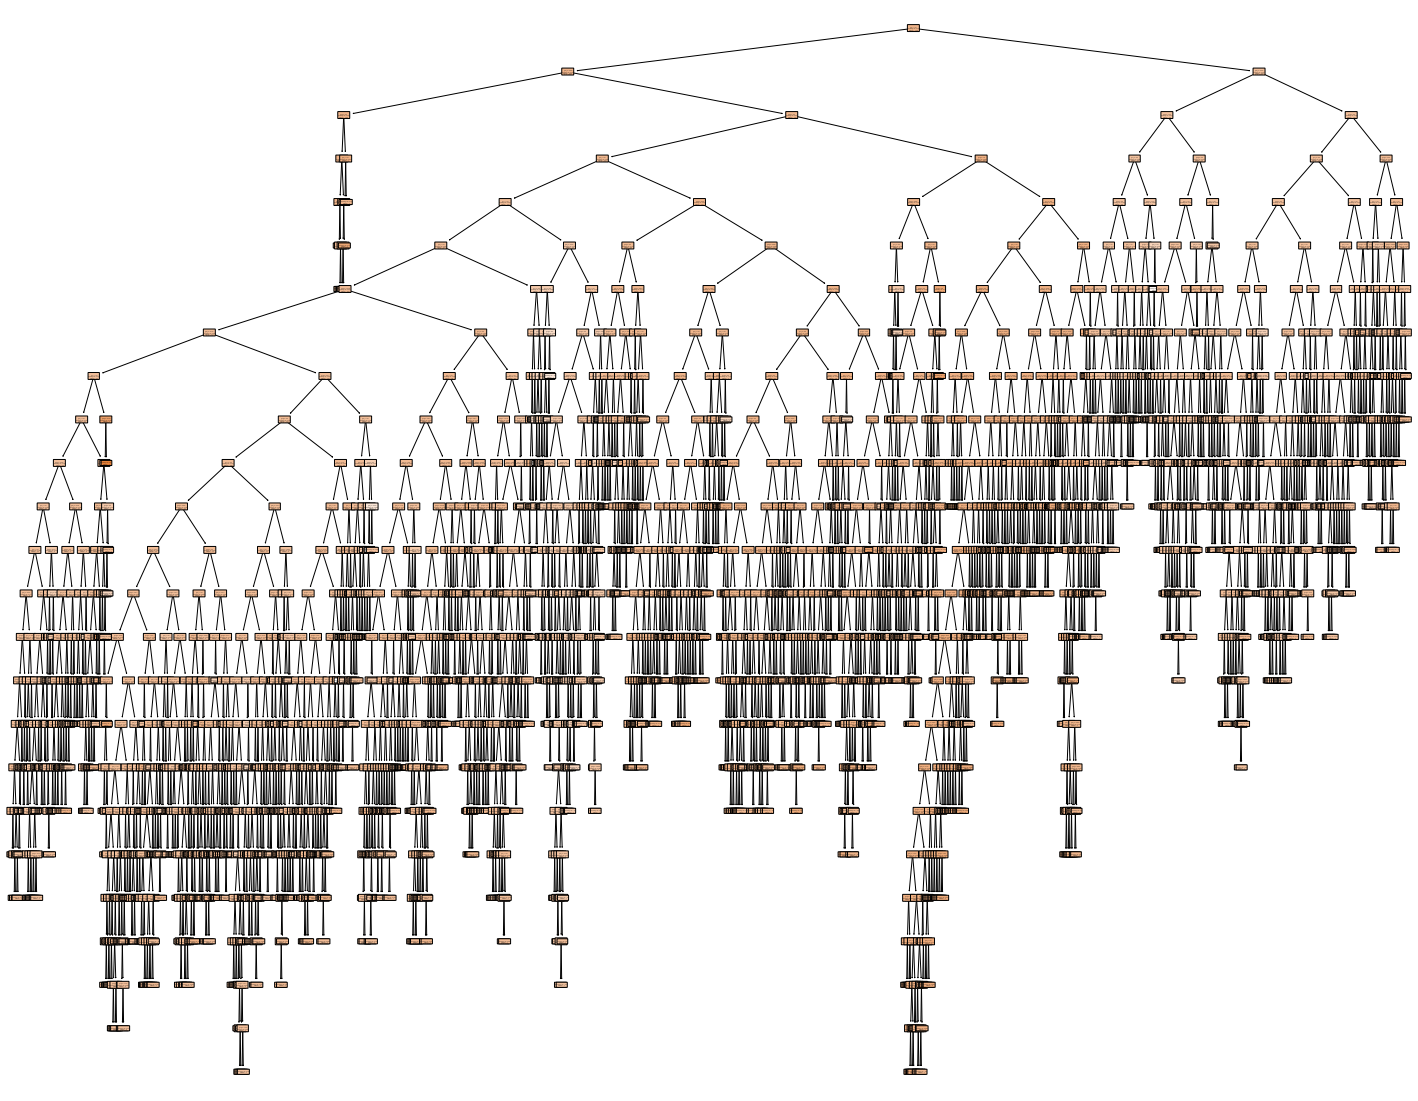

In [69]:
# tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( trees_fit , filled = True , rounded = True  )

## cost complexity pruning path:

DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree-

In [70]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0.001 )

In [71]:
path = trees.cost_complexity_pruning_path( model_X_basic_train, y_basic_train )

alphas, impurities = path.ccp_alphas, path.impurities

In [72]:
alphas

array([0.        , 0.00102291, 0.00120693, 0.00787101, 0.02119091])

In [73]:
mean1, std1 = [], []

for i in alphas:
     tree_initial = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
# 10 fold cross validation for each alpha value
     scores = cross_val_score(tree_initial, model_X_basic_train, y_basic_train, scoring='neg_mean_squared_error', cv=10)
     mean1.append(scores.mean()), std1.append(scores.std())
            
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

table = pd.DataFrame({"alpha": alphas, "mean": mean1, "std": std1})
table["mean"] = (-1)*table["mean"]
table = table.sort_values(["mean"], ascending = True)
table.head(10)

,alpha,mean,std
1,0.001023,0.391860,0.028029
2,0.001207,0.392782,0.027582
3,0.007871,0.406175,0.032680
4,0.021191,0.429592,0.034644
0,0.000000,0.438811,0.037357


In [74]:
prune_tree =  DecisionTreeRegressor(ccp_alpha=table.iloc[1,0], random_state=0)

prune_tree_fit = prune_tree.fit(model_X_basic_train, y_basic_train)

In [75]:
prune_tree_fit.get_depth()  # depth's tree

5

In [76]:
prune_tree_fit.get_n_leaves() # number leaves tree

6

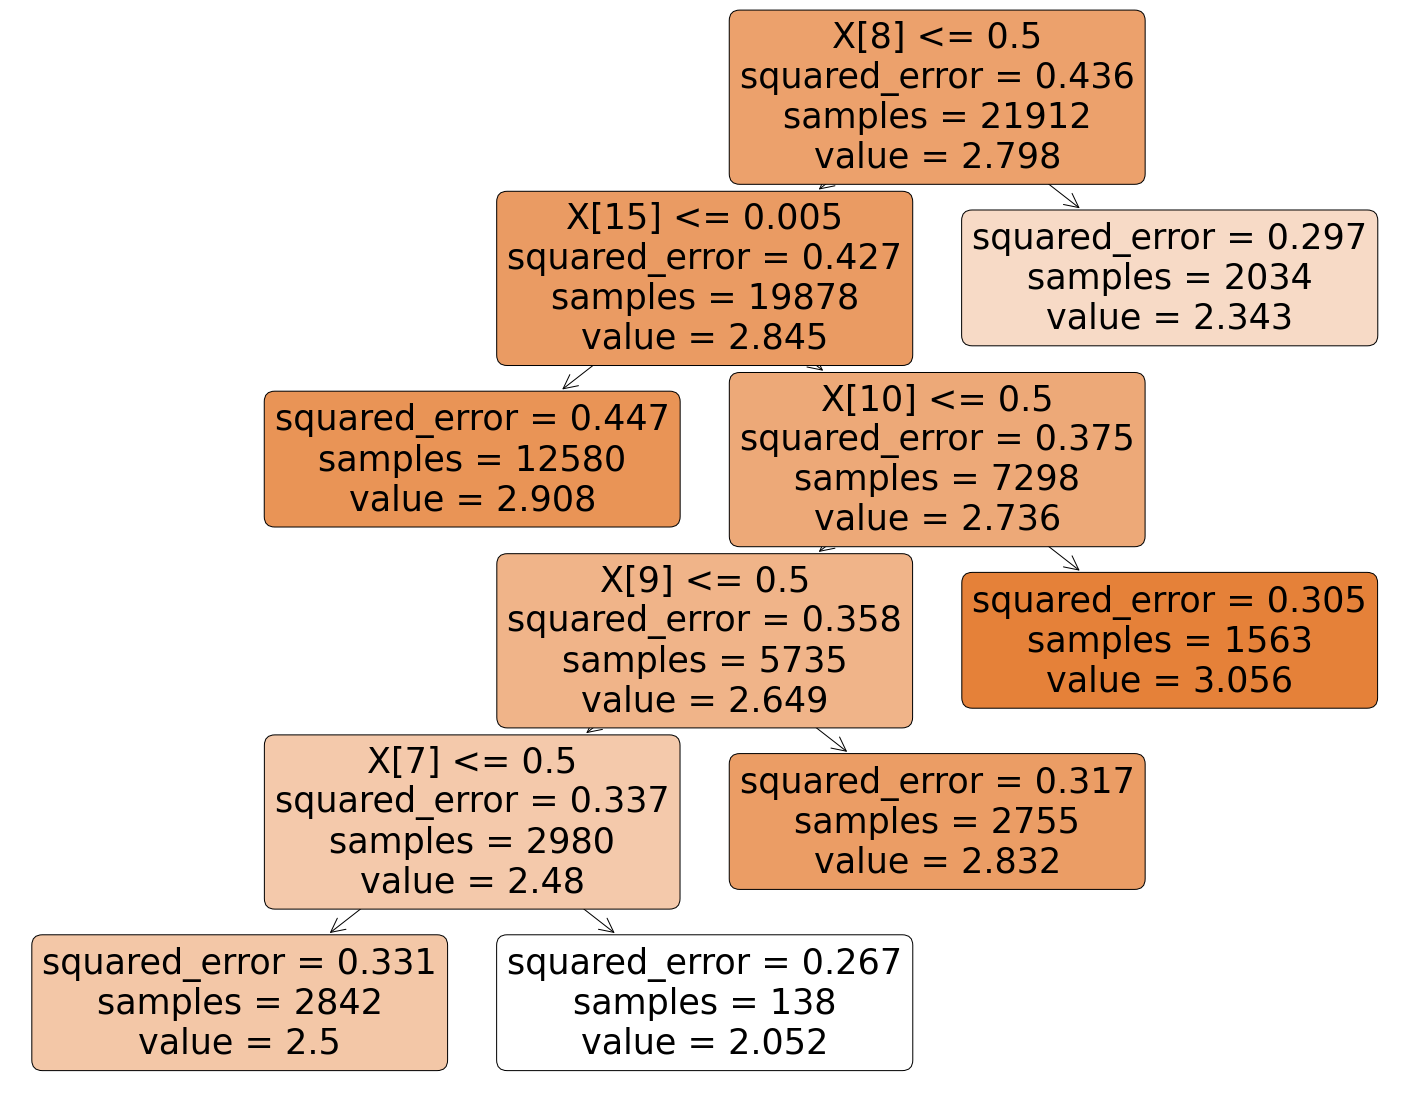

In [77]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( prune_tree_fit , filled = True , rounded = True  )

In [78]:
#Using  GridSearchCV

from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {
 "max_depth":list(range(5,15,2)),
 "min_samples_split":list(range(2, 300,10)),
 "ccp_alpha": [x/10000 for x in range(10, 50,2)]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(model_X_basic_train, y_basic_train)
print("score: ", gridSearch.best_score_)
print("parameters: ", gridSearch.best_params_)

score:  0.08677925760342456
parameters:  {'ccp_alpha': 0.001, 'max_depth': 9, 'min_samples_split': 2}


In [80]:
prunedtree2 = DecisionTreeRegressor(random_state = 0, max_depth=13, ccp_alpha=0.001, min_samples_split=102)
prune_tree_fit2 = prunedtree2.fit(model_X_basic_train, y_basic_train)

In [81]:
prune_tree_fit2.get_depth()

5

In [82]:
prune_tree_fit2.get_n_leaves()

7

In [83]:
model_X_basic_train.columns

Index(['Intercept', 'female', 'female:widowed', 'female:divorced',
       'female:separated', 'female:nevermarried', 'female:hsd08',
       'female:hsd911', 'female:hsg', 'female:cg', 'female:ad', 'female:mw',
       'female:so', 'female:we', 'female:exp1', 'female:exp2', 'female:exp3'],
      dtype='object')

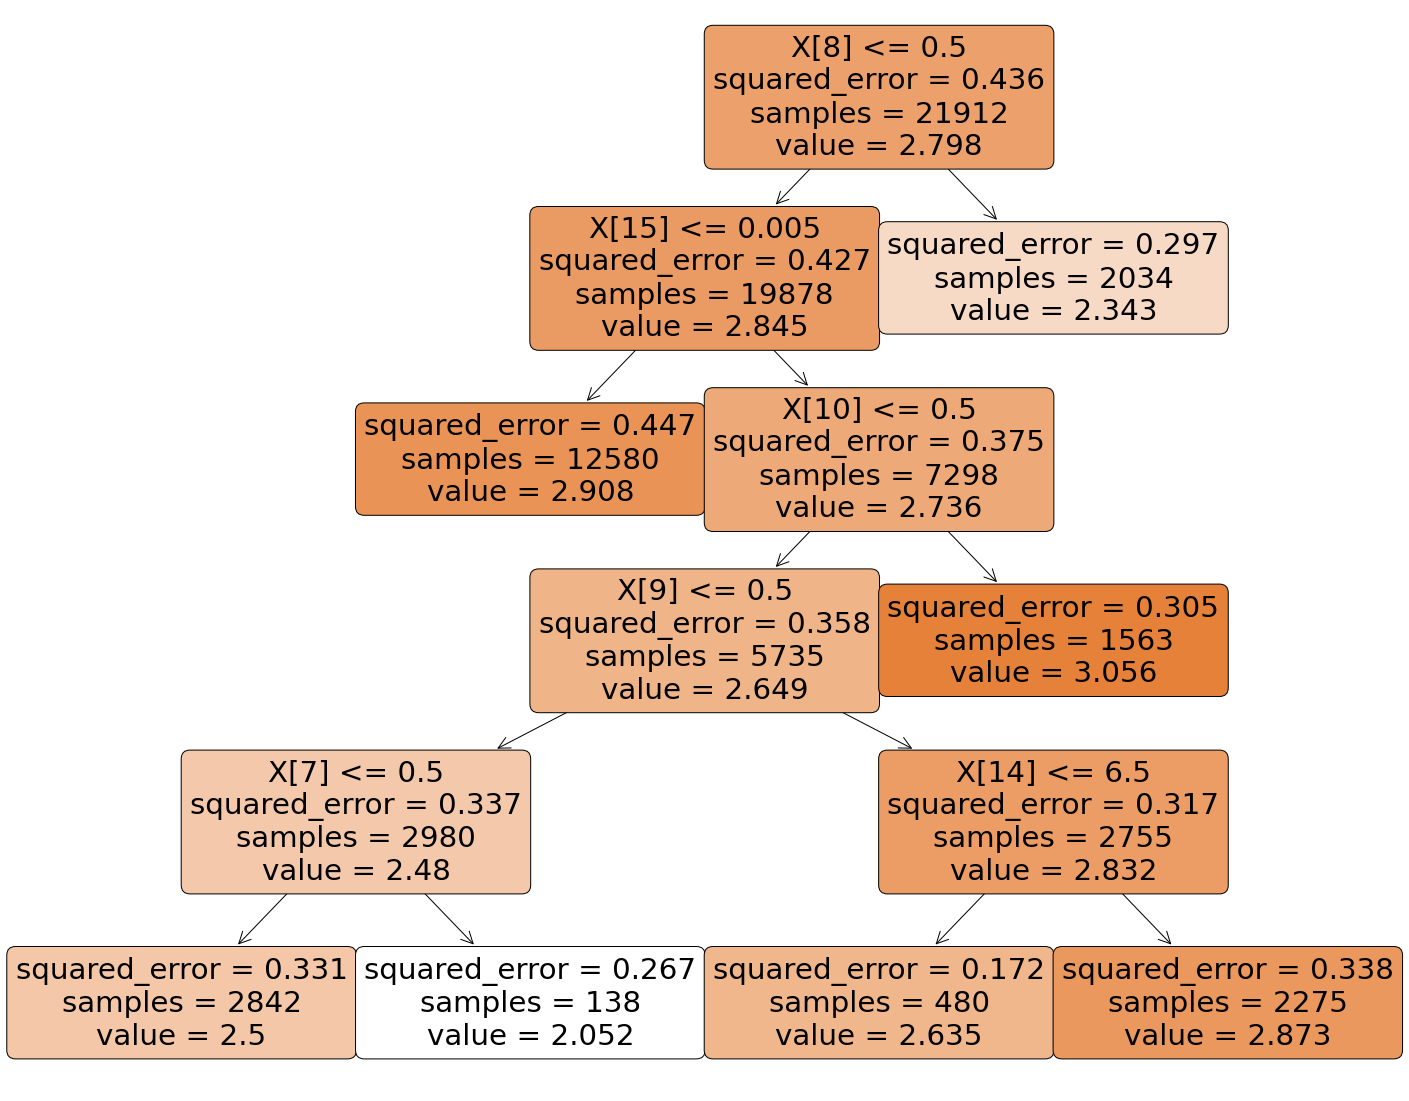

In [84]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( prune_tree_fit2 , filled = True , rounded = True )

In [90]:
y_hat_pt = prune_tree_fit.predict(model_X_basic_test)

MSE_pt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_pt.reshape(-1,1))**2 ) , np.ones( y_hat_pt.shape )  ).fit().summary2().tables[1].round(3)
R2_pt = 1- MSE_pt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_pt}")

R^2 using prune tree: 0.10918394922550445


In [93]:
MSE_pt

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.397,0.016,24.247,0.0,0.365,0.43


In [ ]:
# Results

In [97]:
table= np.zeros( (13, 3) )
table[0,0:2]   = MSE_lm_basic
table[1,0:2]   = MSE_lm_flex
table[2,0:2]   = MSE_lasso.iloc[0, [0, 1]]
table[3,0:2]   = MSE_lasso_post.iloc[0, [0, 1]]
table[4,0:2]   = MSE_lasso_flex.iloc[0, [0, 1]]
table[5,0:2]   = MSE_lasso_post_flex.iloc[0, [0, 1]]
table[6,0:2]   = MSE_lasso_cv_basic.iloc[0, [0, 1]]
table[7,0:2]   = MSE_ridge_basic.iloc[0, [0, 1]]
table[8,0:2]   = MSE_elnet_basic.iloc[0, [0, 1]]
table[9,0:2]   = MSE_lasso_cv_flex.iloc[0, [0, 1]]
table[10,0:2]  = MSE_ridge_flex.iloc[0, [0, 1]]
table[11,0:2]  = MSE_elnet_flex.iloc[0, [0, 1]]
table[12,0:2]  = MSE_pt.iloc[0, [0, 1]]

table[0,2]   = R2_lm_basic
table[1,2]   = R2_lm_flex
table[2,2]   = R2_lasso
table[3,2]   = R2_lasso_post
table[4,2]   = R2_lasso_flex
table[5,2]   = R2_lasso_post_flex
table[6,2]   = R2_lasso_cv_basic
table[7,2]   = R2_ridge_basic
table[8,2]   = R2_elnet_basic
table[9,2]   = R2_lasso_cv_flex
table[10,2]  = R2_ridge_flex
table[11,2]  = R2_elnet_flex
table[12,2]  = R2_pt




colnames_table= ["MSE", "S_E_ for MSE", "R-squared"]
rownames_table= ["Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", \
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)", "Pruned Tree"]
table_pandas = pd.DataFrame( table, columns = colnames_table )
table_pandas.index = rownames_table

table_pandas = table_pandas.round(3)
table_html = table_pandas.to_latex()
table_pandas

C:\Users\Carol\AppData\Local\Temp/ipykernel_18644/3335716488.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_html = table_pandas.to_latex()


,MSE,S_E_ for MSE,R-squared
Least Squares (basic),0.393,0.017,0.119
Least Squares (flexible),0.339,0.016,0.240
Lasso,0.395,0.016,0.114
Post-Lasso,0.396,0.016,0.111
Lasso (flexible),0.340,0.016,0.114
Post-Lasso (flexible),0.341,0.016,0.235
Cross-Validated lasso,0.393,0.017,0.001
Cross-Validated ridge,0.445,0.016,0.118
Cross-Validated elnet,0.394,0.017,0.116
Cross-Validated lasso (flexible),0.338,0.016,0.006
